Q2. Learn the following models on XOR dataset (refer to Tensorflow Playground and generate the dataset on your own containing 200 training instances and 200 test instances) such that all these models achieve similar results (good). The definition of good is left subjective – but you would expect the classifier to capture the shape of the XOR function.
1. a MLP
2. MLP w/ L1 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)
3. MLP w/ L2 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)
4.
learn logistic regression models on the same data with additional features (such as x1*x2, x1^2, etc.)
Show the decision surface and comment on the plots obtained for different models. [2 marks]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


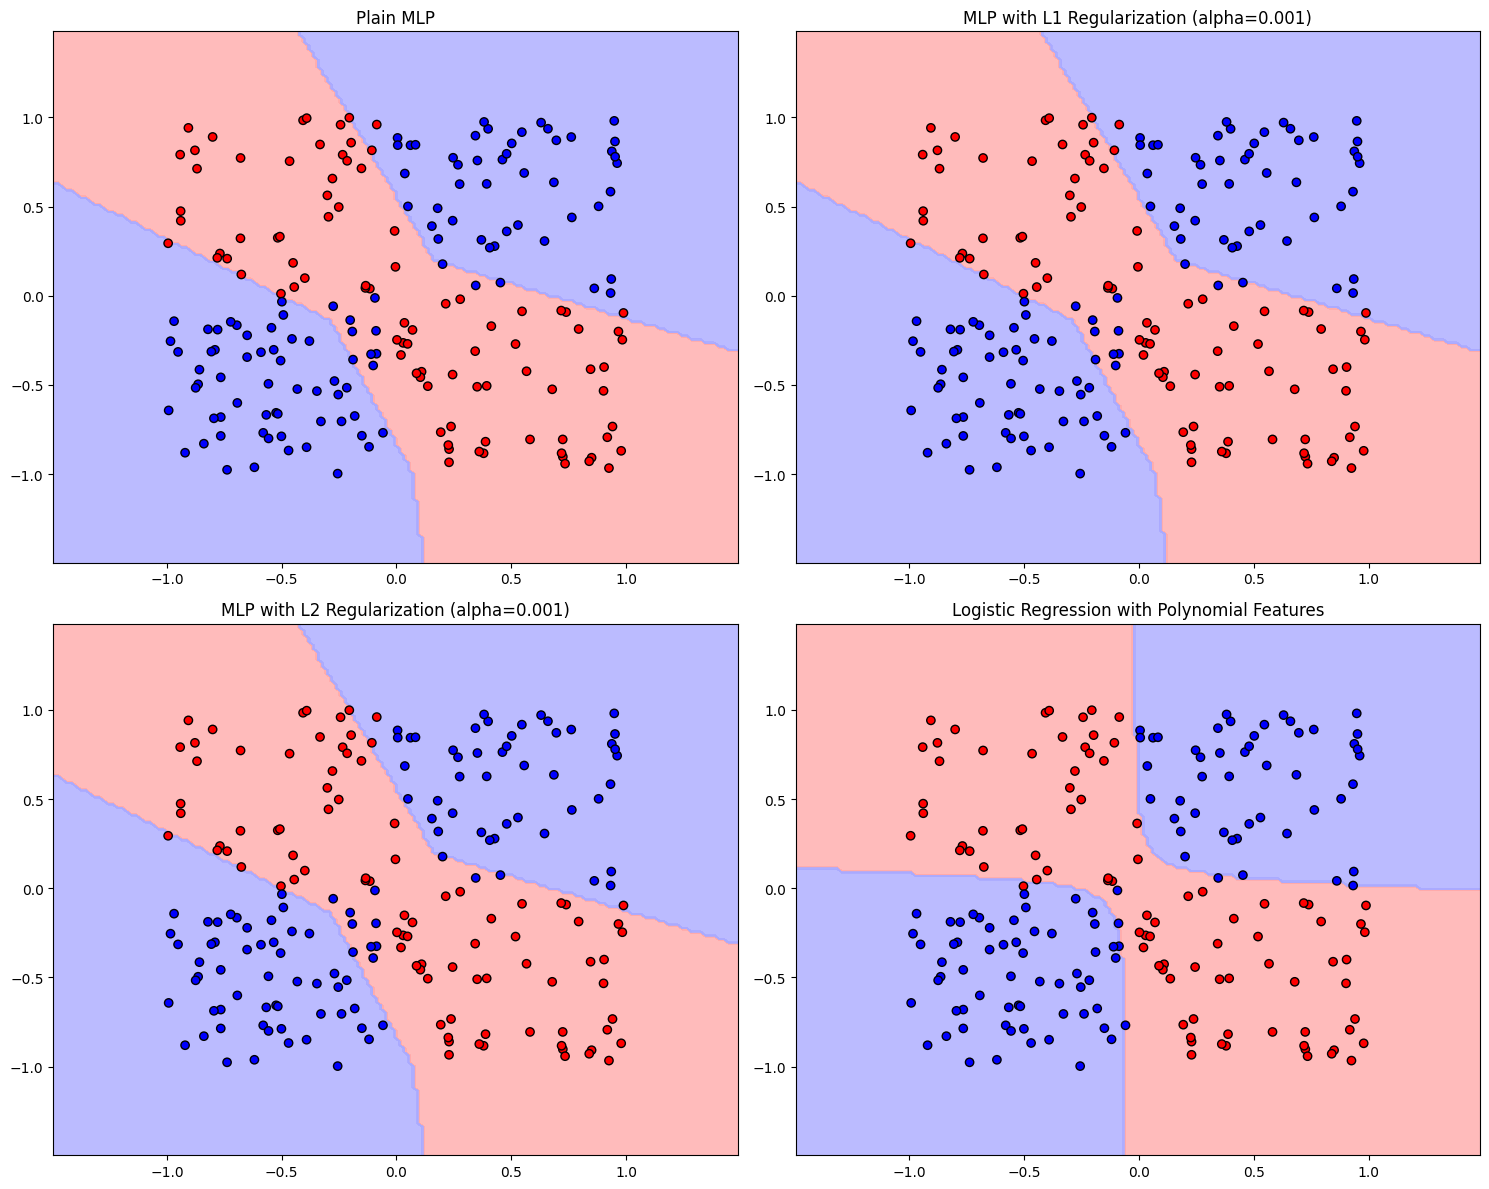

(0.92, 0.92, 0.92, 0.97)

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 1: Generation XOR dataset
np.random.seed(0)
n_train = 200
n_test = 200

# XOR pattern with noise for robustness
def generate_xor_data(n):
    X = np.random.rand(n, 2) * 2 - 1  # Random points in range [-1, 1]
    y = (X[:, 0] * X[:, 1] > 0).astype(int)  # XOR label
    return X, y

X_train, y_train = generate_xor_data(n_train)
X_test, y_test = generate_xor_data(n_test)

# For plotting decision surfaces
def plot_decision_boundary(clf, X, y, ax, title=""):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

# Defining models
# MLP
mlp_plain = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=0)

# MLP with L1 regularization (GridSearchCV for best alpha selection)
param_grid_l1 = {'alpha': np.logspace(-3, 1, 5)}
mlp_l1 = GridSearchCV(MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=0, solver='adam',
                                    activation='relu', learning_rate='adaptive', alpha=1e-4),
                      param_grid_l1, cv=3)

# MLP with L2 regularization
param_grid_l2 = {'alpha': np.logspace(-3, 1, 5)}
mlp_l2 = GridSearchCV(MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=0, solver='adam',
                                    activation='relu', learning_rate='adaptive', alpha=1e-4),
                      param_grid_l2, cv=3)

# Logistic Regression with polynomial features
log_reg_poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000))
])

# Training models
mlp_plain.fit(X_train, y_train)
mlp_l1.fit(X_train, y_train)
mlp_l2.fit(X_train, y_train)
log_reg_poly_pipeline.fit(X_train, y_train)

# Plotting decision boundaries for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plot_decision_boundary(mlp_plain, X_test, y_test, axs[0, 0], "Plain MLP")
plot_decision_boundary(mlp_l1.best_estimator_, X_test, y_test, axs[0, 1], f"MLP with L1 Regularization (alpha={mlp_l1.best_params_['alpha']})")
plot_decision_boundary(mlp_l2.best_estimator_, X_test, y_test, axs[1, 0], f"MLP with L2 Regularization (alpha={mlp_l2.best_params_['alpha']})")
plot_decision_boundary(log_reg_poly_pipeline, X_test, y_test, axs[1, 1], "Logistic Regression with Polynomial Features")

plt.tight_layout()
plt.show()

# Printing test accuracies
mlp_plain_acc = accuracy_score(y_test, mlp_plain.predict(X_test))
mlp_l1_acc = accuracy_score(y_test, mlp_l1.best_estimator_.predict(X_test))
mlp_l2_acc = accuracy_score(y_test, mlp_l2.best_estimator_.predict(X_test))
log_reg_poly_acc = accuracy_score(y_test, log_reg_poly_pipeline.predict(X_test))

mlp_plain_acc, mlp_l1_acc, mlp_l2_acc, log_reg_poly_acc
